___

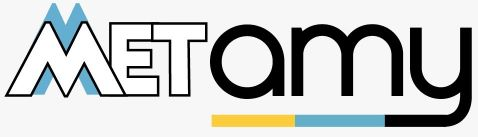

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***other libraries*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [84]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
# kütüphanelerin koda eklenmesi
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
import scikitplot as skplt
from pylab import rcParams
rcParams["figure.figsize"] = 10, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
# kullanılacak veri setinin yüklenmesi
df = pd.read_csv("creditcard.csv")

In [3]:
# veri setine ait ilk 5 satırın gösterilmesi
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# veri setine ait son 5 satırın gösterilmesi
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# veri setine ait rastgele 5 satırın gösterilmesi
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
135240,81164.0,0.749412,-0.417443,0.185592,1.561757,-0.288987,-0.090884,0.412331,-0.121002,0.137298,...,0.038503,-0.099257,-0.262331,0.116406,0.612409,-0.338034,0.004856,0.055210,223.58,0
56959,47694.0,-0.695471,0.933852,1.122342,-1.160664,-0.636954,-1.163185,0.124088,0.419856,0.031530,...,-0.074592,-0.321212,0.028948,0.403167,-0.252059,0.727798,0.047921,0.003653,0.77,0
141620,84428.0,-0.841271,0.613874,1.720768,0.055996,0.611820,1.255528,0.356351,0.467833,-0.172489,...,0.017855,0.310277,0.006000,-0.601751,-0.445650,0.317656,0.024867,0.098728,18.57,0
192791,129850.0,1.699097,-1.096882,0.693107,1.825594,-1.435579,0.958345,-1.445017,0.474598,2.612849,...,0.132762,0.741378,0.020886,-0.420341,-0.159981,-0.450533,0.114644,-0.010490,90.00,0
109739,71522.0,0.019999,-3.627441,-0.192531,-0.829055,-2.220599,0.537354,-0.508819,0.057573,-1.580908,...,0.290920,-0.349382,-0.643124,-0.292813,0.035653,-0.181627,-0.079041,0.131650,740.00,0


In [7]:
# veri setinin boyutunun gösterilmesi
df.shape

(284807, 31)

In [6]:
# veri setinin boyutuna ilişkin veriler
print("Number of Rows", df.shape[0])
print("Number of Columns", df.shape[1])

Number of Rows 284807
Number of Columns 31


In [8]:
# veri setine ait bilgiler
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# tanımlayıcı istatistik için bir fonksiyon oluşturuyoruz ve sütunlarımıza uyguluyoruz
def summary(df, pred = None):
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())    

    if pred is None:
        cols = ["Uniques", "Nulls", "Min", "Max"]
        str = pd.concat([Uniques, Nulls, Min, Max], axis = 1, sort = True)

    str.columns = cols
    return str

display(summary(df).sort_values(by = "Nulls", ascending = False))

,Uniques,Nulls,Min,Max
Amount,32767,0,0.000000,25691.160000
V21,275663,0,-34.830382,27.202839
V8,275663,0,-73.216718,20.007208
V7,275663,0,-43.557242,120.589494
V6,275663,0,-26.160506,73.301626
V5,275663,0,-113.743307,34.801666
V4,275663,0,-5.683171,16.875344
V3,275663,0,-48.325589,9.382558
V28,275663,0,-15.430084,33.847808
V27,275663,0,-22.565679,31.612198


## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

### Exploratory Data Analysis

In [19]:
pd.value_counts(df["Class"])

0    284315
1       492
Name: Class, dtype: int64

In [25]:
#pieplot için fonksiyon tanımlama
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

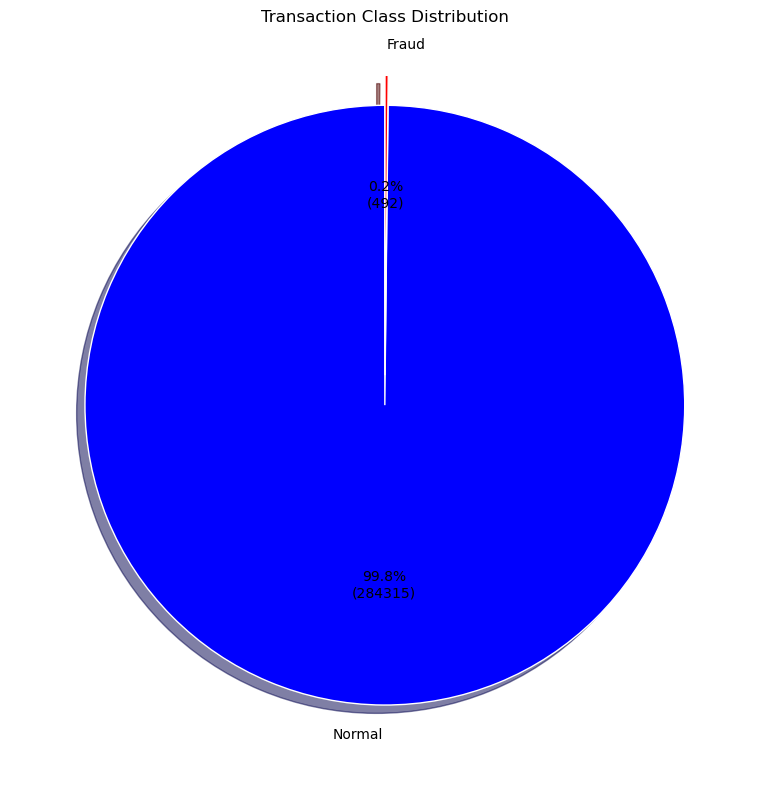

In [34]:
# fraud ve normal etiketlerinin dağılımı
labeling = ["Normal","Fraud"]
color = ["Blue", "Red"]
explode = [0,0.1]
plt.pie(pd.value_counts(df["Class"]).sort_index(), labels = labeling, wedgeprops = {"edgecolor":"white"}, 
        colors = color, explode = explode, shadow = True, startangle = 90, 
        autopct = lambda pct: func(pct, pd.value_counts(df["Class"]).sort_index()))
plt.title("Transaction Class Distribution")
plt.tight_layout()
plt.show()

In [58]:
# fraud ve normal transactionların diğer sütunlara göre değerlendirilmesi
df.groupby("Class").mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.029792,-0.008288,0.037131,-0.012054,-0.005596,-0.011768,0.017497,-0.007346,-0.008050,0.012492,...,0.002717,0.001781,0.005689,-0.001779,-0.006696,-0.004890,-0.000327,0.001557,0.000771,90.521154
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [35]:
# sütunlar arasındaki istatistikler
df.describe(include = "all").style.background_gradient(cmap = "summer")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### Data Cleaning
Check Missing Values and Outliers

In [37]:
# boş değerleri kontrol etme
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [38]:
# datasetini kontrol etme
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
# time sütununu silme
df = df.drop(["Time"], axis = 1)

In [41]:
# datasetini kontrol etme
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
# datasetinin son halinin boyutuna bakma
df.shape

(284807, 30)

In [43]:
# tekrar eden kayıtları bulma
df.duplicated().sum()

9144

In [44]:
# tekrar eden kayıtları silme
df = df.drop_duplicates()

In [45]:
# datasetinin son halinin boyutuna bakma
df.shape

(275663, 30)

In [46]:
# normal ve fraud kayıtların son halinin dağılımları
df["Class"].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [48]:
# veri analizi için ayırma
normal = df[df.Class == 0]
fraud = df[df.Class == 1]

In [49]:
# normal dataframe'in boyutu
normal.shape

(275190, 30)

In [50]:
# fraud dataframe'in boyutu
fraud.shape

(473, 30)

In [51]:
# normal dataframe'in amount sütununun istatistiksel karşılıkları
normal.Amount.describe()

count    275190.000000
mean         90.521154
std         253.198478
min           0.000000
25%           6.390000
50%          23.750000
75%          79.900000
max       25691.160000
Name: Amount, dtype: float64

In [52]:
# fraud dataframe'in amount sütununun istatistiksel karşılıkları
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

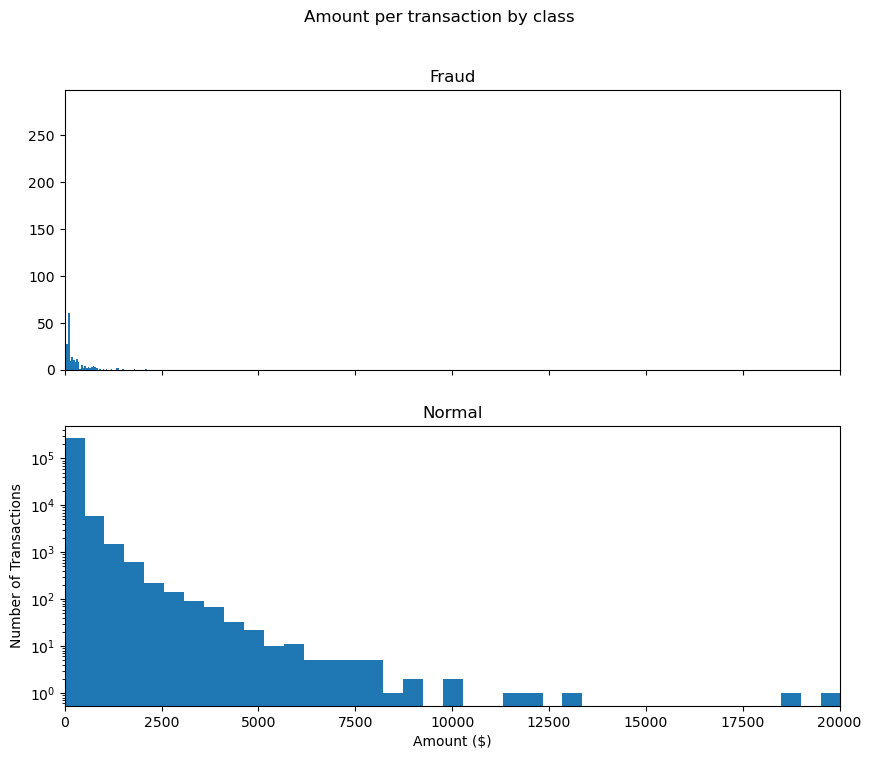

In [54]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle("Amount per transaction by class")
ax1.hist(fraud.Amount, bins = 50)
ax1.set_title("Fraud")
ax2.hist(normal.Amount, bins = 50)
ax2.set_title("Normal")
plt.xlabel("Amount ($)")
plt.ylabel("Number of Transactions")
plt.xlim((0, 20000))
plt.yscale("log")
plt.show();

In [55]:
# fraud'un normale oranı
outlier_fraction = len(fraud)/float(len(normal))

In [56]:
# outlier_fraction'ı bulma
print(outlier_fraction)
print("Fraud Cases : {}".format(len(fraud)))
print("Normal Cases : {}".format(len(normal)))

0.001718812456847996
Fraud Cases : 473
Normal Cases : 275190


In [59]:
# datasetin yüzde 10'undan oluşan yeni bir dataframe oluşturma
df1 = df.sample(frac = 0.1, random_state = 1)
df1.shape

(27566, 30)

In [60]:
# veri setinin orjinal halini kontrol etme
df.shape

(275663, 30)

In [61]:
# yeni veri setinde fraud'un normale oranı
Fraud = df1[df1["Class"] == 1]
Normal = df1[df1["Class"] == 0]
outlier_fraction = len(Fraud)/float(len(Normal))

In [62]:
# yeni veri setinin outlier_fraction'ı bulma
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Normal)))

0.0018535344357623114
Fraud Cases : 51
Valid Cases : 27515


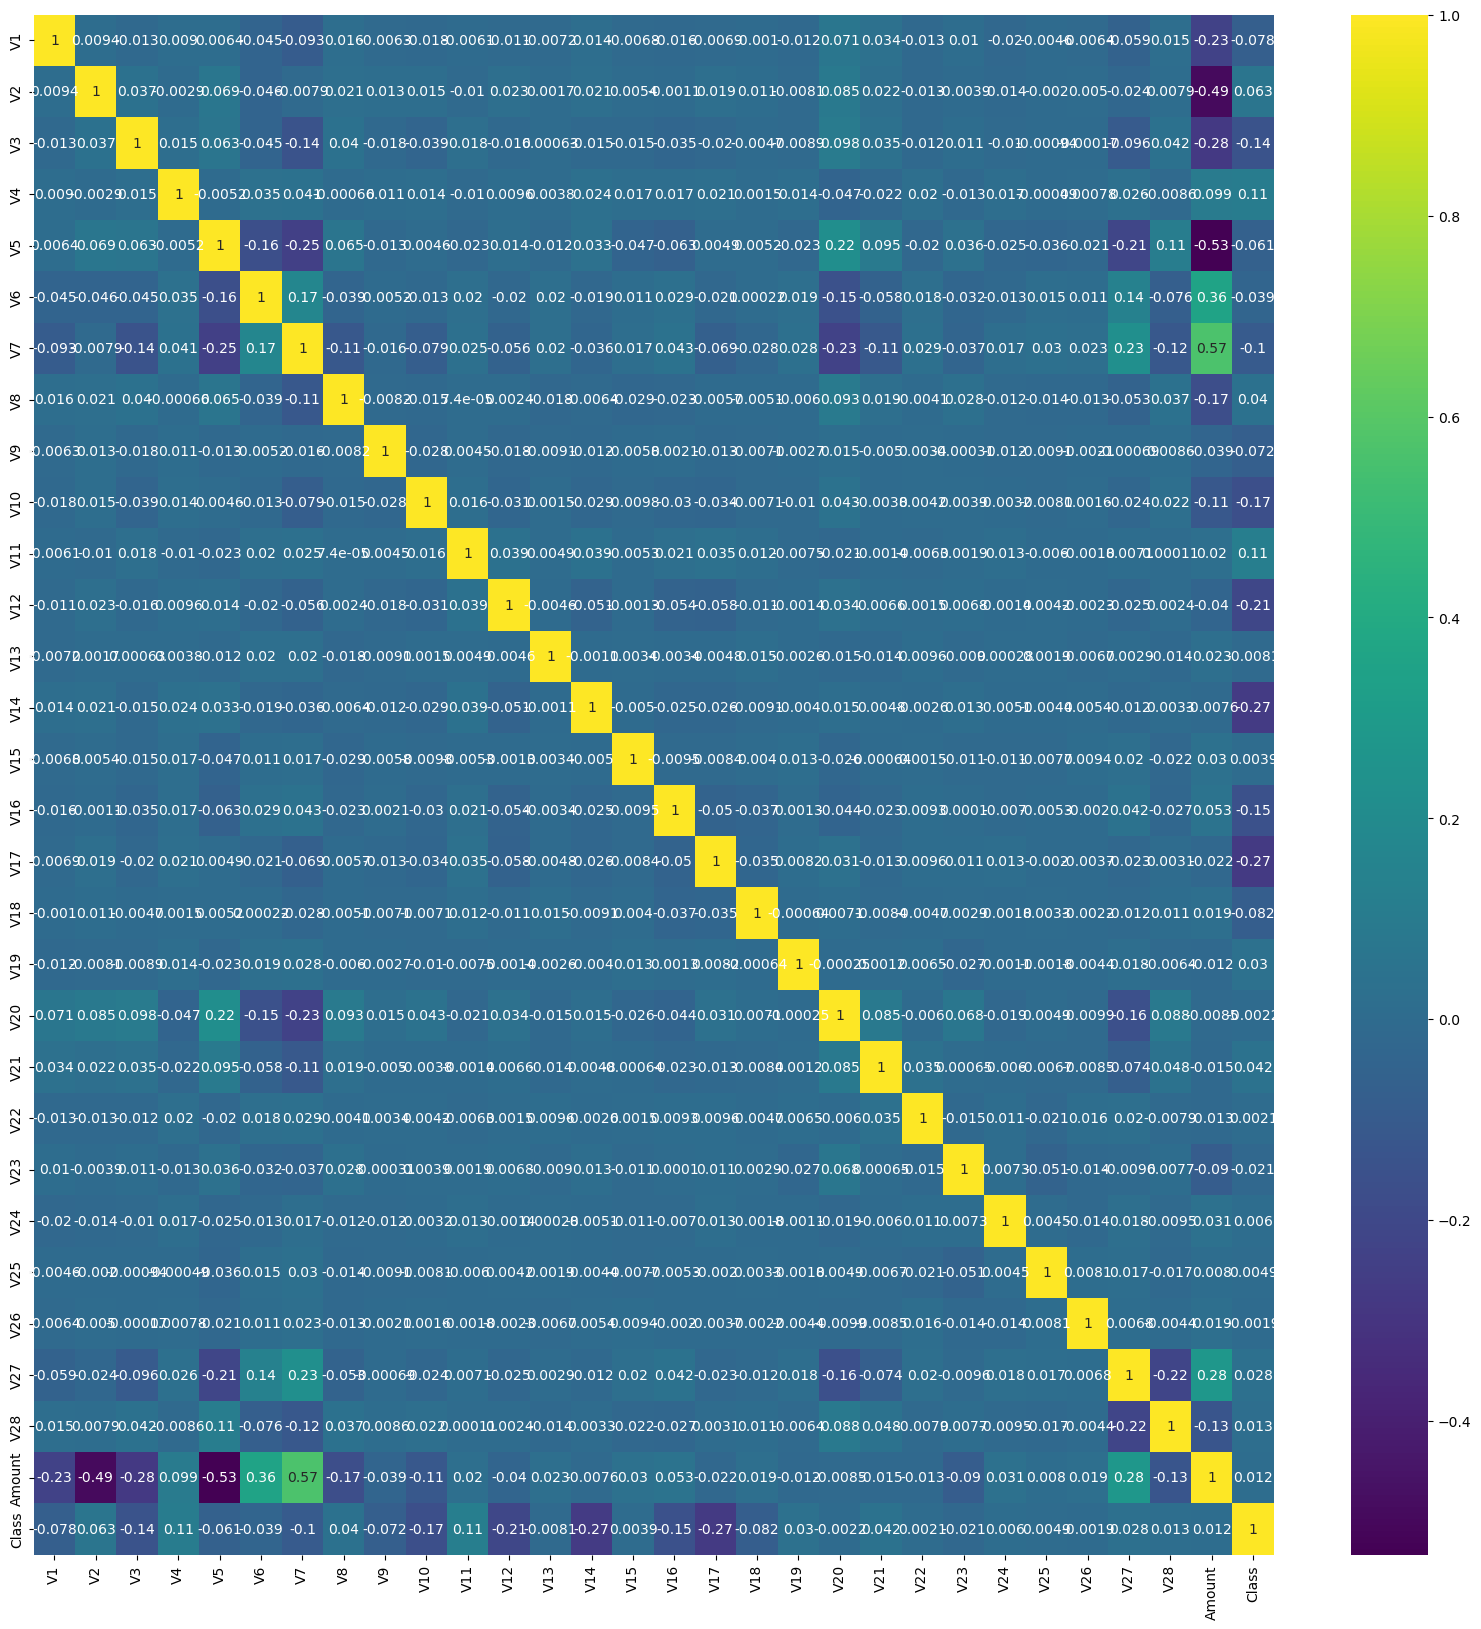

In [68]:
# korelasyon bulma
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))
g = sns.heatmap(df1[top_corr_features].corr(), annot = True, cmap = "viridis")

In [69]:
# sütunlar arasındaki korelasyonu yazıya dökelim
df_temp = df1.corr()

count = "Done"
feature = []
collinear = []
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i] > .9 and df_temp[col][i] < 1) or (df_temp[col][i] < -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f"\033[1mmulticolinearity alert in between\033[0m {col} - {i}")
        else:
            print(f"{col} and {i}, NO multicollinearity") 

print("\033[1mThe number of strong corelated features:\033[0m", count) 

V1 and V1, NO multicollinearity
V1 and V2, NO multicollinearity
V1 and V3, NO multicollinearity
V1 and V4, NO multicollinearity
V1 and V5, NO multicollinearity
V1 and V6, NO multicollinearity
V1 and V7, NO multicollinearity
V1 and V8, NO multicollinearity
V1 and V9, NO multicollinearity
V1 and V10, NO multicollinearity
V1 and V11, NO multicollinearity
V1 and V12, NO multicollinearity
V1 and V13, NO multicollinearity
V1 and V14, NO multicollinearity
V1 and V15, NO multicollinearity
V1 and V16, NO multicollinearity
V1 and V17, NO multicollinearity
V1 and V18, NO multicollinearity
V1 and V19, NO multicollinearity
V1 and V20, NO multicollinearity
V1 and V21, NO multicollinearity
V1 and V22, NO multicollinearity
V1 and V23, NO multicollinearity
V1 and V24, NO multicollinearity
V1 and V25, NO multicollinearity
V1 and V26, NO multicollinearity
V1 and V27, NO multicollinearity
V1 and V28, NO multicollinearity
V1 and Amount, NO multicollinearity
V1 and Class, NO multicollinearity
V2 and V1, NO 

---
---


## 2. Data Preprocessing

#### Train - Test Split

In [71]:
# datasetimizi target ve feature olarak ayırma
X = df.drop(columns = "Class", axis = 1)
Y = df["Class"]

In [72]:
print(X)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.25141

In [73]:
print (Y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 275663, dtype: int64


In [75]:
# kütüphane yükleme
from sklearn.model_selection import train_test_split

In [76]:
#data setimizi 70/30'a göre eğitim ve test olarak ayırma
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 2)

In [78]:
# target ve feature'ların eğitim ve test bölümlerinin boyutları
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(275663, 29) (192964, 29) (82699, 29)
(275663,) (192964,) (82699,)


## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

#### Scaling

In [80]:
# scaling işlemi
sc = StandardScaler()
df = sc.fit_transform(df)

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with four different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

### Logistic Regression 

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

In [101]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

***ii. Model Training***

In [82]:
# logisticRegression modelinin uygulanması
lr_model = LogisticRegression()

In [83]:
# verinin modele göre eğitilmesi
lr_model.fit(X_train, Y_train)

C:\Users\yasem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

***iii. Prediction and Model Evaluating  and Tuning***

In [85]:
# modele göre tahminlerin oluşturulması
Y_test_predict = lr_model.predict(X_test)
Y_train_predict = lr_model.predict(X_train)

In [86]:
# doğruluk değerlerinin bulunması
test_data_accuracy = accuracy_score(Y_test, Y_test_predict)
training_data_accuracy = accuracy_score(Y_train, Y_train_predict)

In [87]:
# bulunan accuracy sonuçları
print ("Accuracy on Test Data : ", test_data_accuracy)
print ("Accuracy on Training Data : ", training_data_accuracy)

Accuracy on Test Data :  0.9990205443838499
Accuracy on Training Data :  0.9991241889678903


In [88]:
# raporları gösterme
print("TEST REPORT")
print(classification_report(Y_test, Y_test_predict))

print("\n", "-"*52)
print("TRAIN REPORT")
print(classification_report(Y_train, Y_train_predict))

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82557
           1       0.80      0.58      0.67       142

    accuracy                           1.00     82699
   macro avg       0.90      0.79      0.83     82699
weighted avg       1.00      1.00      1.00     82699


 ----------------------------------------------------
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    192633
           1       0.84      0.61      0.70       331

    accuracy                           1.00    192964
   macro avg       0.92      0.80      0.85    192964
weighted avg       1.00      1.00      1.00    192964



***iv. Plot Precision and Recall Curve***


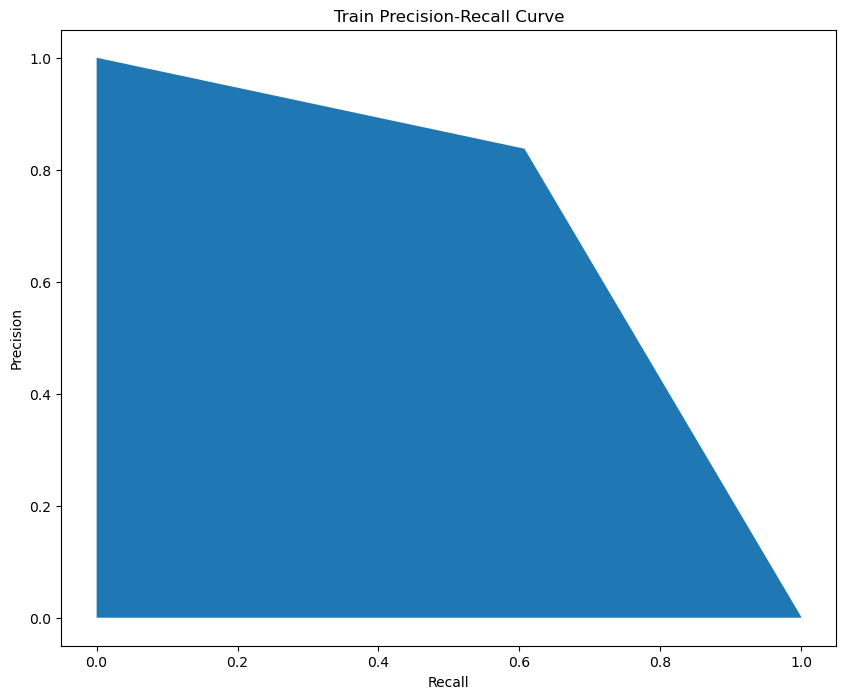

In [105]:
# görselleştirme
precision, recall, thresholds = precision_recall_curve(Y_train, Y_train_predict)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall Curve");

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Logistic Regression with Unbalanced Data Techniques

***i. Train-Test Split (Again)***

Handling Imbalanced Dataset

Undersampling (also we can use oversampling)

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of fraudulant Transactions -- 473

In [106]:
# fraud'un boyutuna göre örnek alma
normal_sample = normal.sample(n = 473)

In [107]:
# fraud'un boyutu
fraud.shape

(473, 30)

In [108]:
# normal'in boyutu
normal.shape

(275190, 30)

In [109]:
# normal_sample'in boyutu
normal_sample.shape

(473, 30)

Concatenating two Dataframes

In [110]:
# birleştirm
new_data = pd.concat([normal_sample, fraud], axis=0)

In [111]:
# yeni dataframe'in ilk 5 kaydına bakma
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
25959,0.041325,0.737611,0.010663,0.089032,0.815337,0.615965,0.327254,0.171068,0.663451,-0.126206,...,-0.223325,-0.041245,-0.139248,-1.237934,-0.213897,0.349756,0.181250,-0.162352,10.70,0
179277,-0.734981,0.322148,0.155290,-0.841314,1.724126,-0.319859,1.030120,-0.130879,-0.073016,-1.419010,...,-0.153981,-0.393922,-0.127996,0.152370,0.146258,-0.144964,-0.098704,-0.057543,61.18,0
61022,-4.998446,2.820501,-2.598280,2.734786,-2.119385,0.730768,-1.534566,3.194272,-1.227944,1.019930,...,-0.152684,-0.929401,-0.387362,-1.355845,0.070221,0.153020,0.219468,-0.051741,90.24,0
109559,0.839640,-0.917731,1.175804,1.538371,-0.901176,1.544846,-0.961085,0.510463,1.526145,-0.284656,...,-0.003900,0.122218,-0.383337,-0.778583,0.624438,-0.185764,0.074557,0.042697,158.99,0
128722,1.144836,-0.159041,-0.688237,-0.007705,0.139939,-0.885993,0.619786,-0.408984,-0.190140,-0.153848,...,-0.022307,-0.285462,-0.304441,-0.351375,0.636423,1.107719,-0.134135,0.004977,129.95,0


In [112]:
# yeni dataframe'in class'nın sayılarına bakma
new_data["Class"].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [113]:
# yeni dataframe'in class'ına göre ortalaması
new_data.groupby("Class").mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.10434,0.157676,-0.083051,-0.136007,-0.001715,0.104367,-0.107590,0.004901,-0.004347,0.056543,...,0.028810,0.000463,-0.026877,0.002327,-0.015959,0.000040,-0.036749,0.018895,0.010369,74.87852
1,-4.49828,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.87186


In [114]:
# yenidataframe'i feature ve target olarak ayırma
X = new_data.drop(columns = "Class", axis = 1)
Y = new_data["Class"]

In [115]:
# ayırdığımız feature ve target değerlerini eğitim ve test olarak ayırma
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

***ii. Model Training***

In [116]:
# modeli oluşturma
lr_model = LogisticRegression()

In [117]:
# eğitilen veri ile modeli fit etme
lr_model.fit(X_train, Y_train)

LogisticRegression()

***Prediction and Model Evaluating and Tuning***

In [118]:
# tahminleri oluşturma
Y_test_predict1 = lr_model.predict(X_test)
Y_train_predict1 = lr_model.predict(X_train)

In [119]:
# tahmin edilen değerlerin accuracy sonuçları
test_data_accuracy = accuracy_score(Y_test,Y_test_predict1)
training_data_accuracy = accuracy_score(Y_train, Y_train_predict1)

In [120]:
# doğruluk değerleri
print ("Accuracy on Test Data : ", test_data_accuracy)
print ("Accuracy on Training Data : ", training_data_accuracy)

Accuracy on Test Data :  0.9295774647887324
Accuracy on Training Data :  0.9577039274924471


In [121]:
# accuracy score
accuracy_score(Y_test,Y_test_predict1)

0.9295774647887324

In [122]:
# precision score
precision_score(Y_test,Y_test_predict1)

0.9552238805970149

In [123]:
# recall score
recall_score(Y_test,Y_test_predict1)

0.9014084507042254

In [124]:
# f1_score
f1_score(Y_test,Y_test_predict1)

0.927536231884058

In [125]:
# raporları gösterme
print("TEST REPORT")
print(classification_report(Y_test, Y_test_predict1))

print("\n", "-"*52)
print("TRAIN REPORT")
print(classification_report(Y_train, Y_train_predict1))

TEST REPORT
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       142
           1       0.96      0.90      0.93       142

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284


 ----------------------------------------------------
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       331
           1       0.98      0.93      0.96       331

    accuracy                           0.96       662
   macro avg       0.96      0.96      0.96       662
weighted avg       0.96      0.96      0.96       662



***iv.  Plot Precision and Recall Curve***


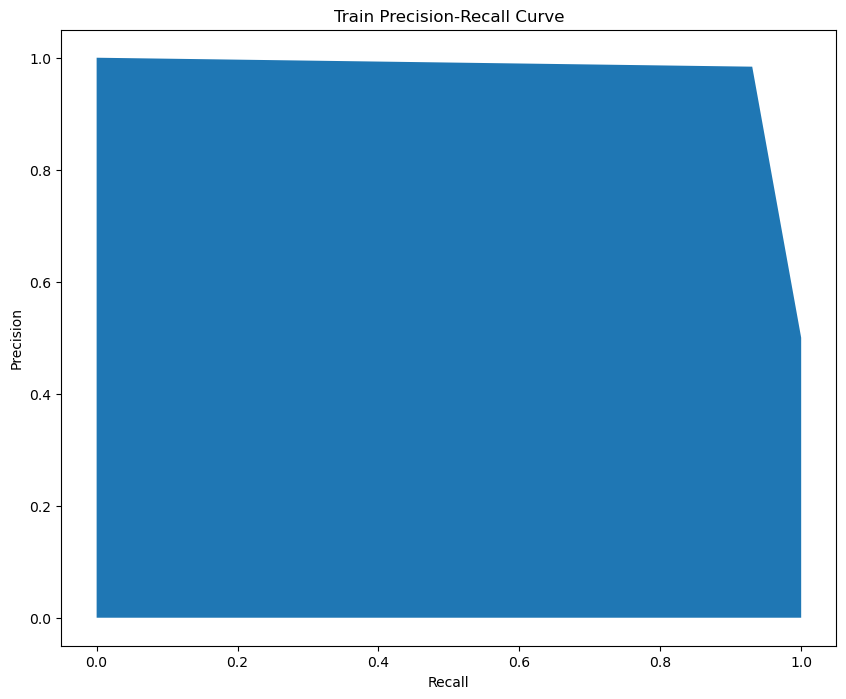

In [127]:
# görselleştirme
precision, recall, thresholds = precision_recall_curve(Y_train, Y_train_predict1)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall Curve");

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Random Forest Classifier with Unbalanced Data Techniques
   

***i. Model Training***

In [129]:
# kütüphane dahil etme
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor 

In [130]:
# model oluşturma ve fit etme
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

***ii. Prediction and Model Evaluating and Tuning***

In [132]:
# tahminleri oluşturma
Y_test_predict2 = rf.predict(X_test)

In [134]:
# accuracy sonuçları
test_data_accuracy = accuracy_score(Y_test, Y_test_predict2)

In [135]:
# accuracy sonucu
print ("Accuracy on Test Data : ", test_data_accuracy)

Accuracy on Test Data :  0.926056338028169


In [136]:
# precision sonucu
precision_score(Y_test,Y_test_predict2)

0.9548872180451128

In [137]:
# recall sonucu
recall_score(Y_test,Y_test_predict2)

0.8943661971830986

In [138]:
# f1 sonucu
f1_score(Y_test,Y_test_predict2)

0.9236363636363636

In [139]:
# rapor görme
print("TEST REPORT")
print(classification_report(Y_test, Y_test_predict2))

TEST REPORT
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       142
           1       0.95      0.89      0.92       142

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



***iii. Plot Precision and Recall Curve***


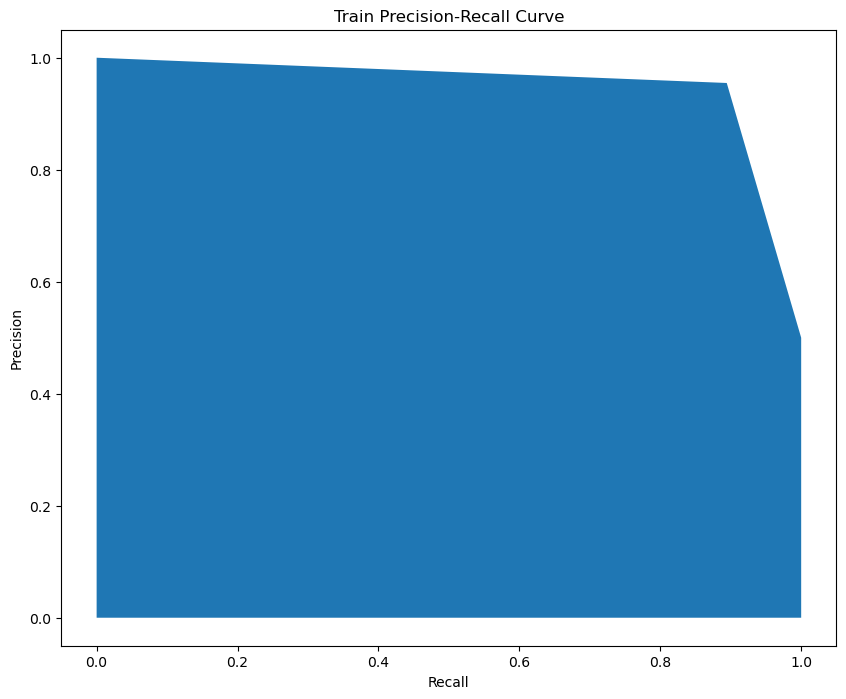

In [141]:
# görselleştirme
precision, recall, thresholds = precision_recall_curve(Y_test, Y_test_predict2)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall Curve");

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### XGBoost Classifier with Unbalanced Data Techniques

***i. Model Training***

In [147]:
import xgboost

In [149]:
# modeli oluşturma ve fit etme
xg = xgboost.XGBClassifier()
xg.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [150]:
# fonksiyon oluşturma
def PrintStats(cmat, Y_test, Y_test_predict3):
    tpos = cmat[0][0] 
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [151]:
# fonksiyon oluşturma
def RunModel(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train.values.ravel())
    Y_test_predict3 = model.predict(X_test)
    matrix = confusion_matrix(Y_test, Y_test_predict3)
    return matrix, Y_test_predict3

In [152]:
# fonksiyonları uygulama
cmat, Y_test_predict3 = RunModel(xg, X_train, Y_train, X_test, Y_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

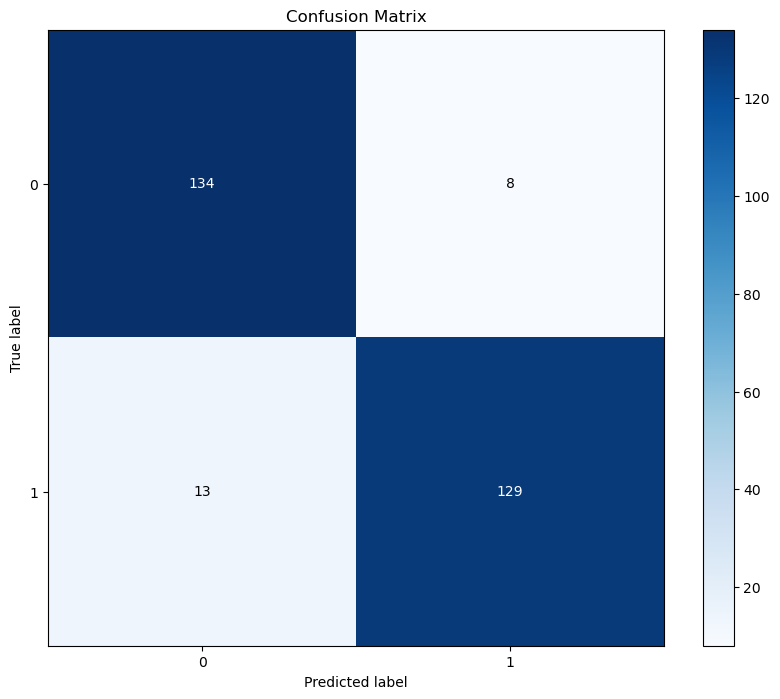

In [153]:
# confusion matrix oluşturma
skplt.metrics.plot_confusion_matrix(Y_test, Y_test_predict3)

***ii. Prediction and Model Evaluating and Tuning***

In [154]:
# accuracy sonucu
accuracy_score(Y_test, Y_test_predict3)

0.926056338028169

In [155]:
# rapor gösterme
print (classification_report(Y_test, Y_test_predict3))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       142
           1       0.94      0.91      0.92       142

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



***iii. Plot Precision and Recall Curve***


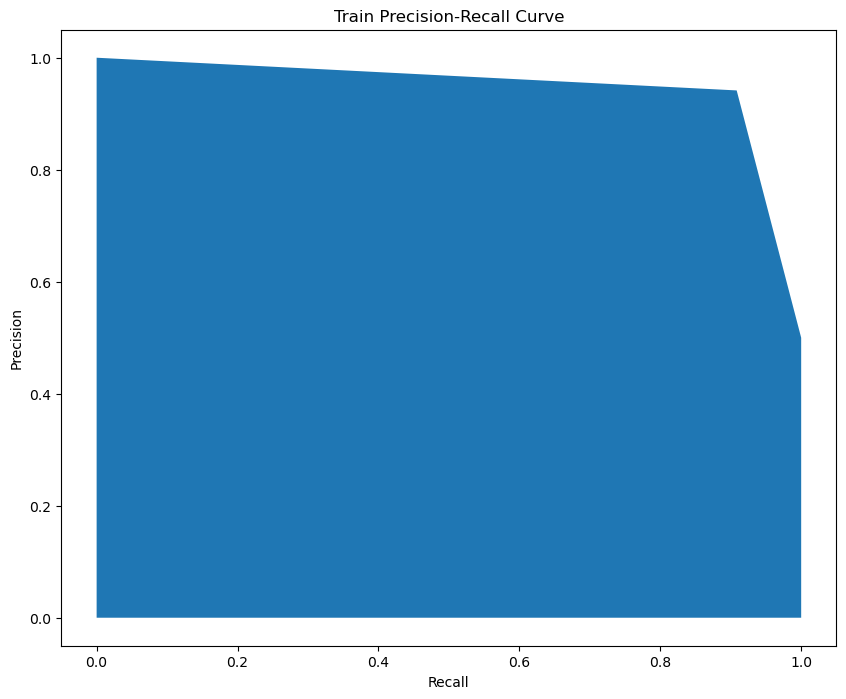

In [157]:
# görselleştirme
precision, recall, thresholds = precision_recall_curve(Y_test, Y_test_predict3)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall Curve");

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

***ii. Define Model***

In [158]:
cnn = Sequential()
cnn.add(Conv1D(32, 2, activation = "relu", input_shape = (29,1)))
cnn.add(Dropout(0.1))

In [159]:
cnn.add(BatchNormalization())
cnn.add(Conv1D(64, 2, activation = "relu"))
cnn.add(Dropout(0.2))

In [160]:
cnn.add(Flatten())
cnn.add(Dropout(0.4))
cnn.add(Dense(64, activation = "relu"))
cnn.add(Dropout(0.5))

In [161]:
cnn.add(Dense(1, activation = "sigmoid"))

In [162]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 32)            96        
                                                                 
 dropout (Dropout)           (None, 28, 32)            0         
                                                                 
 batch_normalization (Batch  (None, 28, 32)            128       
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 27, 64)            4160      
                                                                 
 dropout_1 (Dropout)         (None, 27, 64)            0         
                                                                 
 flatten (Flatten)           (None, 1728)              0         
                                                        

***iii. Compile Model***

In [163]:
cnn.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate=0.0001), metrics = ["accuracy"])

***iv. Fit Model***

In [164]:
history = cnn.fit(X_train, Y_train, epochs = 20, validation_data = (X_test, Y_test), verbose = 1)

Epoch 1/20
21/21 [==============================] - 2s 21ms/step - loss: 0.6259 - accuracy: 0.6934 - val_loss: 0.5228 - val_accuracy: 0.6162
Epoch 2/20
21/21 [==============================] - 0s 9ms/step - loss: 0.4773 - accuracy: 0.7976 - val_loss: 0.4585 - val_accuracy: 0.7817
Epoch 3/20
21/21 [==============================] - 0s 9ms/step - loss: 0.4105 - accuracy: 0.8595 - val_loss: 0.4001 - val_accuracy: 0.8908
Epoch 4/20
21/21 [==============================] - 0s 9ms/step - loss: 0.3196 - accuracy: 0.8927 - val_loss: 0.3508 - val_accuracy: 0.8979
Epoch 5/20
21/21 [==============================] - 0s 8ms/step - loss: 0.2960 - accuracy: 0.8988 - val_loss: 0.3096 - val_accuracy: 0.9120
Epoch 6/20
21/21 [==============================] - 0s 7ms/step - loss: 0.2885 - accuracy: 0.9003 - val_loss: 0.2762 - val_accuracy: 0.9190
Epoch 7/20
21/21 [==============================] - 0s 8ms/step - loss: 0.2853 - accuracy: 0.9124 - val_loss: 0.2600 - val_accuracy: 0.9190
Epoch 8/20
21/21 [=

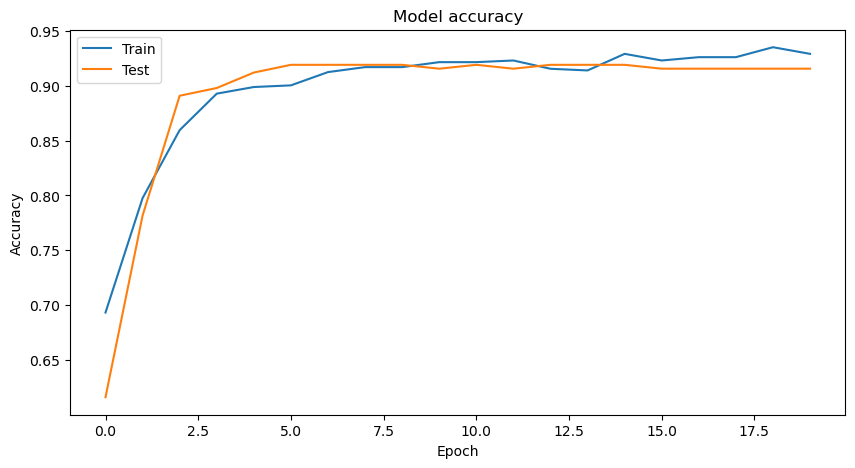

In [165]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

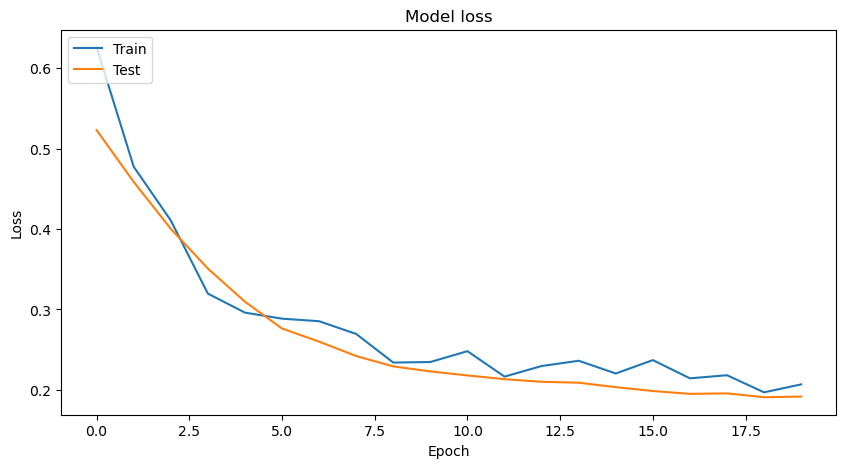

In [166]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

9/9 [==============================] - 0s 2ms/step


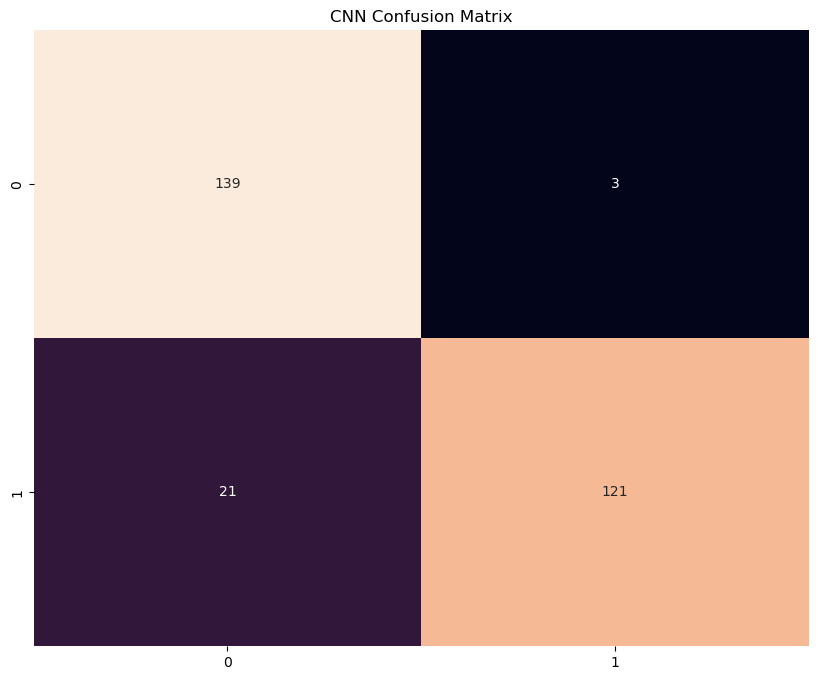

In [167]:
from sklearn.metrics import confusion_matrix
Y_test_predict4 = cnn.predict(X_test)
classes_x=np.argmax(Y_test_predict4, axis=1)
confusion_matrix = confusion_matrix(Y_test, Y_test_predict4>0.5)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cbar = False)
plt.title("CNN Confusion Matrix")
plt.show()

***v. Prediction and Model Evaluating***

In [168]:
# accuracy sonucu
accuracy_score(Y_test,Y_test_predict4 > 0.5)

0.9154929577464789

In [169]:
# classification metrikleri ölçümleri
precision, recall, fscore, support = score(Y_test, Y_test_predict4 > 0.5)
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))

precision: [0.86875    0.97580645]
recall: [0.97887324 0.85211268]
fscore: [0.9205298  0.90977444]
support: [142 142]


***vi. Plot Precision and Recall Curve***

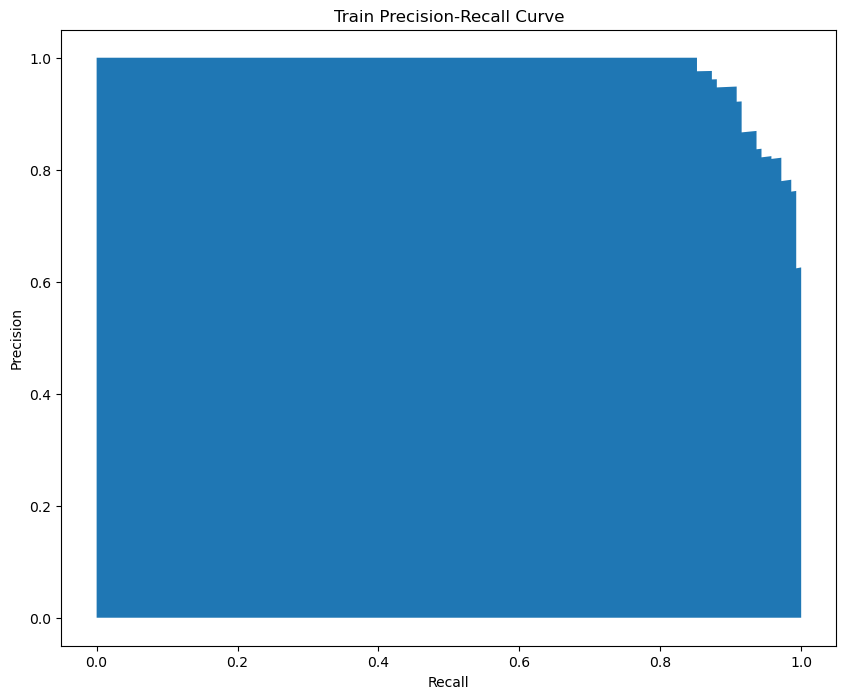

In [170]:
# görselleştirme
precision, recall, thresholds = precision_recall_curve(Y_test, Y_test_predict4)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall Curve");

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


In [171]:
final_data = pd.DataFrame({"Models":["LR","RF","XG","CNN"],
              "ACC":[accuracy_score(Y_test,Y_test_predict1)*100,
                     accuracy_score(Y_test,Y_test_predict2)*100,
                     accuracy_score(Y_test,Y_test_predict3)*100,
                     accuracy_score(Y_test,Y_test_predict4>0.5)*100
                    ]})

In [172]:
final_data

,Models,ACC
0,LR,92.957746
1,RF,92.605634
2,XG,92.605634
3,CNN,91.549296


<Axes: xlabel='Models', ylabel='ACC'>

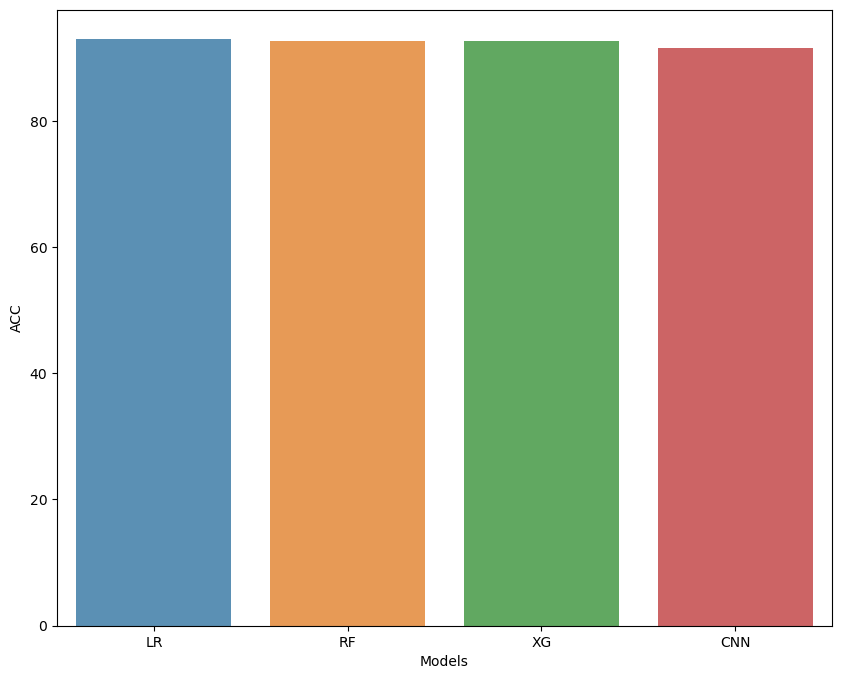

In [175]:
# görselleştirme
sns.barplot(x = final_data["Models"], y = final_data["ACC"], alpha = 0.8)

### Save and Export Variables

In [177]:
import pickle

In [178]:
filename = "LR"
pickle.dump(lr_model, open("LR.pkl", "wb"))

In [179]:
file = pickle.load(open("LR.pkl", "rb"))

In [181]:
my_dict = {
    "V1": 0.59,
    "V2": 0.59,
    "V3": 0.59,
    "V4": 0.59,
    "V5": 0.59,
    "V6": 0.59,
    "V7": 0.59,
    "V8": 0.59,
    "V9": 0.59,
    "V10": 0.59,
    "V11": 0.59,
    "V12": 0.59,
    "V13": 0.59,
    "V14": 0.59,
    "V15": 0.59,
    "V16": 0.59,
    "V17": 0.59,
    "V18": 0.59,
    "V19": 0.59,
    "V20": 0.59,
    "V21": 0.59,
    "V22": 0.59,
    "V23": 0.59,
    "V24": 0.59,
    "V25": 0.59,
    "V26": 0.59,
    "V27": 0.59,
    "V28": 0.59,
    "Amount": 1
}

In [182]:
df_n = pd.DataFrame.from_dict([my_dict])
df_n

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,...,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,1


In [183]:
prediction = file.predict(df_n)
print(prediction)

[0]


In [184]:
print("Whether normal or fraud is = {}. ".format(int(prediction[0])))

Whether normal or fraud is = 0. 
